In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Earthquake Perception Dataset.csv')

In [ ]:
print(data.head())
print(data.info())
print(data.describe())

    age     sex marital_status        residence               education  \
0  21.0    Male      Unmarried           Napoli  Upper Secondary School   
1  21.0  Female      Unmarried           Napoli  Upper Secondary School   
2  21.0  Female      Unmarried           Napoli  Upper Secondary School   
3  23.0    Male      Unmarried           Quarto  Upper Secondary School   
4  64.0  Female      Unmarried  Somma Vesuviana                  Degree   

       occupation out_of_region_employment family_members family_disabilities  \
0         Student                       No              4                  No   
1         Student                       No              5                  No   
2  Student Worker                       No              5                  No   
3         Student                       No              5                  No   
4         Retired                       No              1                  No   

  house_floor  ... INGV_trust security  reception_centers  pro

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols)

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7464788732394366
Confusion Matrix:
[[102   2]
 [ 34   4]]
Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.98      0.85       104
        True       0.67      0.11      0.18        38

    accuracy                           0.75       142
   macro avg       0.71      0.54      0.52       142
weighted avg       0.73      0.75      0.67       142



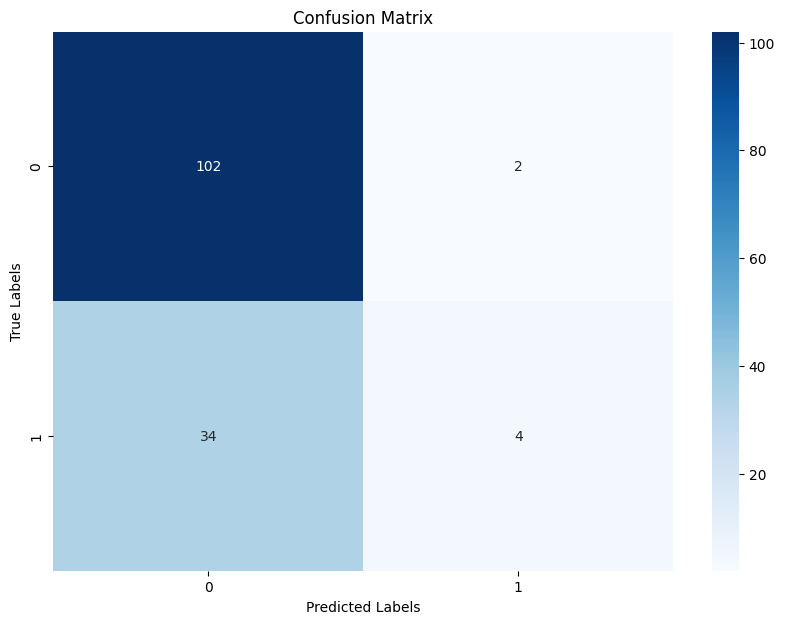

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

In [ ]:
f1_scores = [class_report[key]['f1-score'] for key in class_report if key != 'accuracy']
precision_scores = [class_report[key]['precision'] for key in class_report if key != 'accuracy']
recall_scores = [class_report[key]['recall'] for key in class_report if key != 'accuracy']
labels = [key for key in class_report if key != 'accuracy']

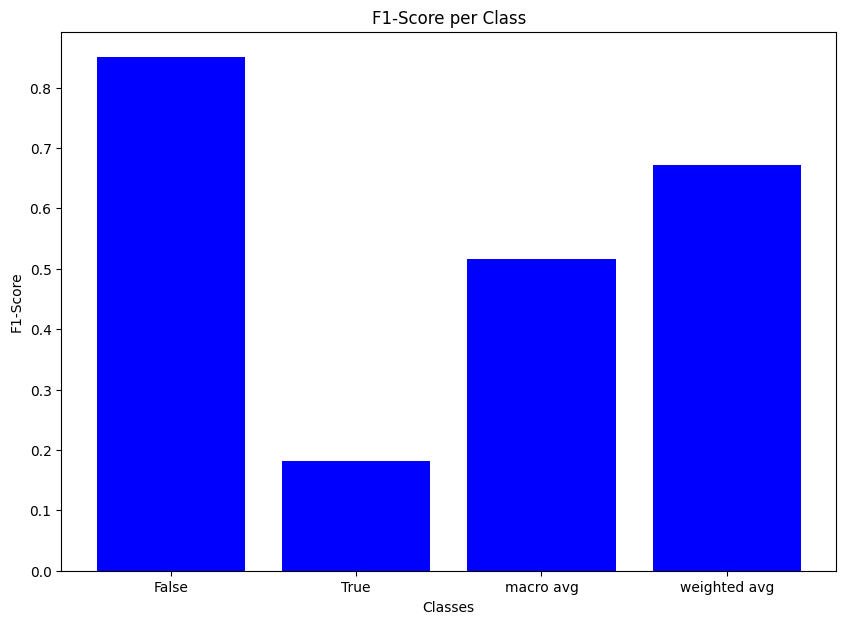

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(labels, f1_scores, color='blue')
plt.title('F1-Score per Class')
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.show()

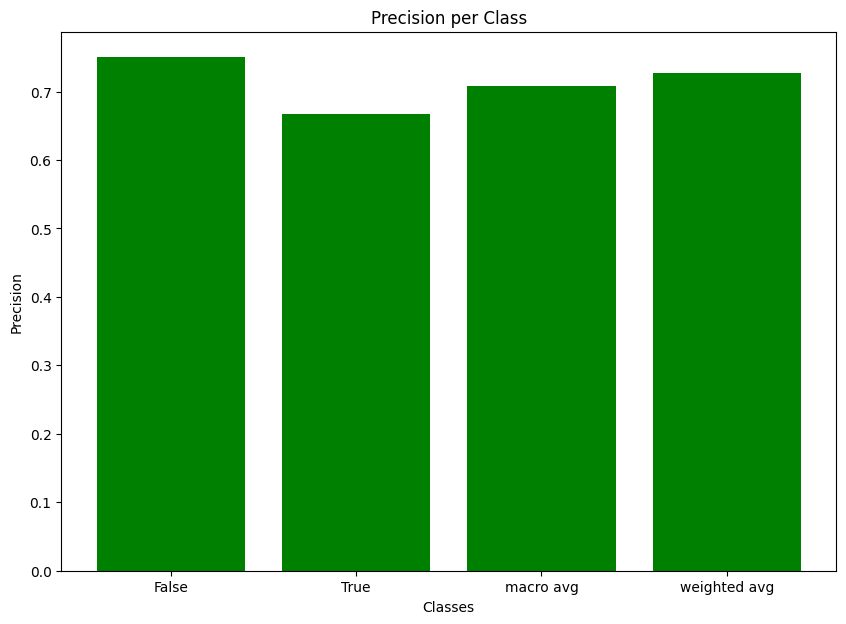

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(labels, precision_scores, color='green')
plt.title('Precision per Class')
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.show()

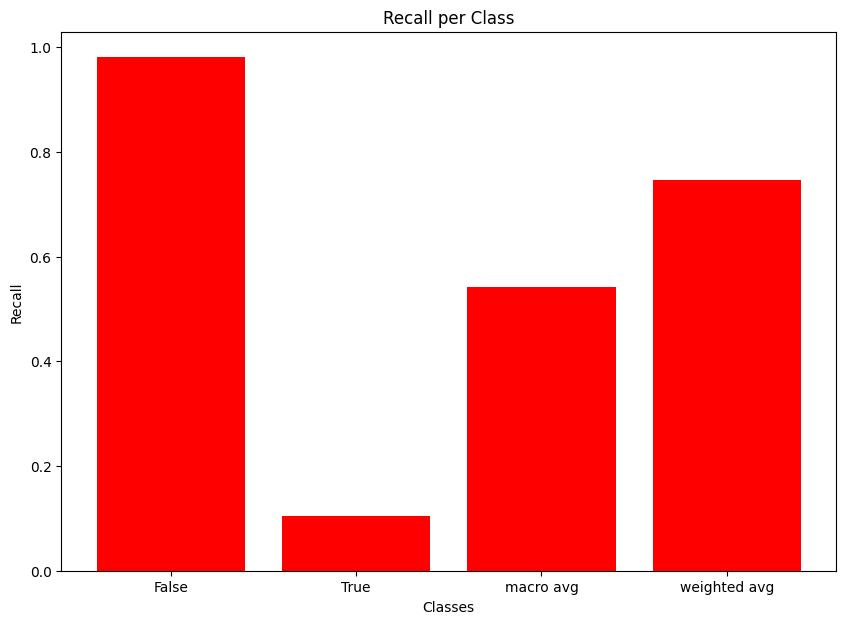

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(labels, recall_scores, color='red')
plt.title('Recall per Class')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.show()